In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Package

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

## Menampilkan Gambar

In [3]:
image = Image.open("/content/drive/MyDrive/image/ikan_bandeng.jpg")

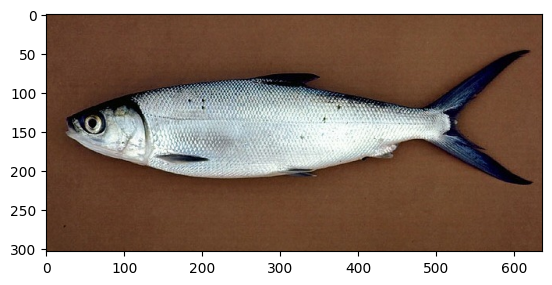

In [4]:
plt.imshow(image)
plt.show()

In [5]:
pixel_array = np.array(image)

print("Image Shape:", pixel_array.shape)
print(pixel_array)

Image Shape: (304, 636, 3)
[[[ 91  55  33]
  [ 99  63  41]
  [ 96  60  38]
  ...
  [109  67  45]
  [112  67  46]
  [112  67  46]]

 [[ 95  59  37]
  [100  64  42]
  [ 97  61  39]
  ...
  [109  67  45]
  [113  68  47]
  [113  68  47]]

 [[ 98  62  40]
  [ 98  62  40]
  [ 97  61  39]
  ...
  [111  69  47]
  [112  70  48]
  [113  71  49]]

 ...

 [[ 87  55  34]
  [ 85  53  32]
  [ 84  52  31]
  ...
  [ 94  56  35]
  [ 92  54  33]
  [ 91  53  32]]

 [[ 89  57  36]
  [ 85  53  32]
  [ 83  51  30]
  ...
  [102  64  43]
  [102  64  43]
  [101  63  42]]

 [[ 88  56  35]
  [ 84  52  31]
  [ 82  50  29]
  ...
  [ 98  60  39]
  [101  63  42]
  [103  65  44]]]


## Grayscale

In [19]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    grayscale = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return grayscale

## Operator Sobel

In [10]:
def sobel_operator(image):
    # Kernel Sobel
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

    gradient_x = ndimage.convolve(image, sobel_x)
    gradient_y = ndimage.convolve(image, sobel_y)

    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_magnitude

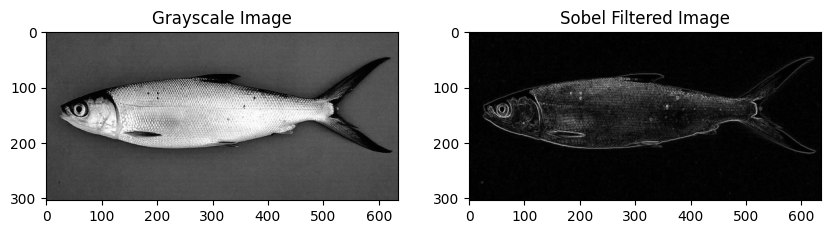

In [12]:
gray_image = rgb2gray(pixel_array)
sobel_result = sobel_operator(gray_image)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')


plt.subplot(1, 2, 2)
plt.imshow(sobel_result, cmap='gray')
plt.title('Sobel Filtered Image')

plt.show()

In [16]:
print(sobel_result.shape)

(304, 636)


In [17]:
print(sobel_result)

[[31.77731911 18.38293783 20.39403845 ...  9.09741663  5.86745459
   3.9996    ]
 [26.90455737  9.999      17.26095023 ... 13.05866425 11.39502145
  11.00123459]
 [ 4.24221642 11.04425648  7.21038144 ... 15.55480105 12.78644656
  11.35894197]
 ...
 [15.80980716 12.64784573  5.65628856 ... 20.24643189 17.71827314
  11.04425648]
 [14.14072141 21.21108212  7.07036071 ... 17.26095023 33.9966
  45.00660863]
 [16.49077326 24.32861702  3.9996     ... 24.08078084 14.55876376
   7.07036071]]


## Operator Prewitt

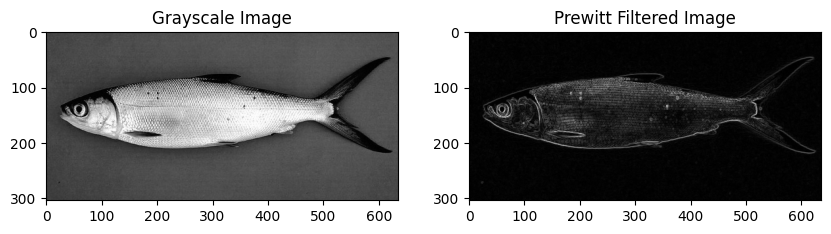

In [20]:
def prewitt_operator(image):
    # Kernel Prewitt
    prewitt_x = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1],
                        [0, 0, 0],
                        [1, 1, 1]])

    gradient_x = ndimage.convolve(image, prewitt_x)
    gradient_y = ndimage.convolve(image, prewitt_y)

    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_magnitude

prewitt_result = prewitt_operator(gray_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')


plt.subplot(1, 2, 2)
plt.imshow(prewitt_result, cmap='gray')
plt.title('Prewitt Filtered Image')

plt.show()

In [21]:
print(prewitt_result.shape)

(304, 636)


In [22]:
print(prewitt_result)

[[22.84503459 13.41506622 15.29552883 ...  7.10243655  4.50069151
   2.9997    ]
 [18.38293783  9.2186225  12.16430851 ...  9.44565299  8.59649594
   8.02930273]
 [ 4.9995      5.38462629  5.65628856 ... 11.31258744  9.98822336
   8.21395777]
 ...
 [11.40061408  9.4858843   3.60519072 ... 14.55876376 12.16430851
   8.9991    ]
 [10.04887063 15.13123268  5.09850961 ... 13.3403299  25.01749001
  32.9967    ]
 [12.36807995 18.24646276  2.9997     ... 16.96886569  9.4858843
   4.24221642]]


## Operator Roberts

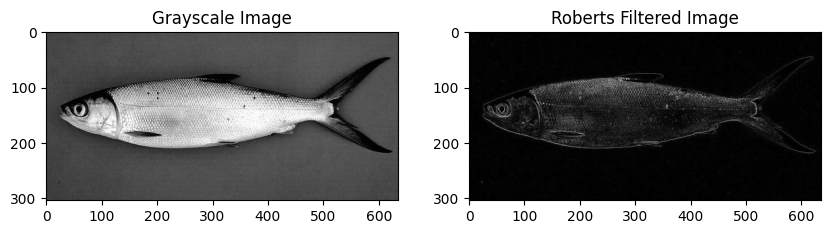

In [23]:
def roberts_operator(image):
    # Kernel Roberts
    roberts_x = np.array([[1, 0],
                        [0, -1]])
    roberts_y = np.array([[0, 1],
                        [-1, 0]])
    gradient_x = ndimage.convolve(image, roberts_x)
    gradient_y = ndimage.convolve(image, roberts_y)

    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_magnitude

roberts_result = roberts_operator(gray_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')


plt.subplot(1, 2, 2)
plt.imshow(roberts_result, cmap='gray')
plt.title('Roberts Filtered Image')

plt.show()

In [24]:
print(roberts_result.shape)

(304, 636)


In [25]:
print(roberts_result)

[[ 9.84787292  4.47168874  3.16196143 ...  2.25033927  1.41407214
   1.41407214]
 [ 3.60519072  3.16196143  2.23584437 ...  2.99971944  2.2213599
   2.81287078]
 [ 4.47168874  3.16196143  0.9999     ...  1.9998      1.9998
   1.41407214]
 ...
 [ 4.47168874  2.23584437  3.16196143 ... 12.80496785 14.21124914
  14.14072141]
 [ 5.8303688   3.16196143  3.16196143 ...  4.12269332  0.9999
   2.82814428]
 [ 5.65628856  2.82814428  2.82814428 ...  4.24221642  2.82814428
   0.        ]]


## Operator Canny

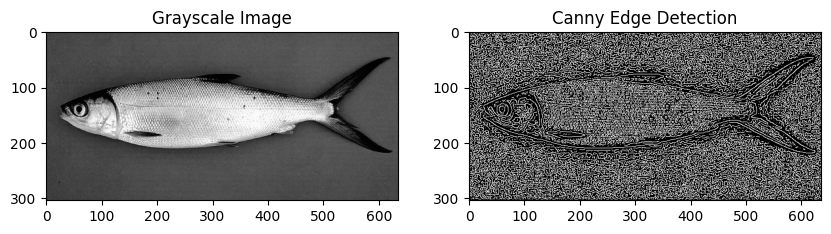

In [26]:
from skimage.feature import canny

canny_edges = canny(gray_image, sigma=1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.show()

In [27]:
print(canny_edges.shape)

(304, 636)


In [28]:
print(canny_edges)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ...  True  True False]
 ...
 [False  True False ...  True False False]
 [False  True False ...  True  True False]
 [False False False ... False False False]]


## LAPLACE OF GAUSSIAN

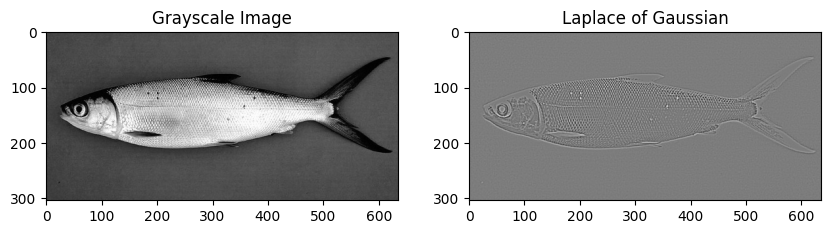

In [29]:
from scipy.ndimage import gaussian_laplace

def laplace_of_gaussian(image, sigma=1):
    log_image = gaussian_laplace(image, sigma=sigma)
    return log_image

log_result = laplace_of_gaussian(gray_image, sigma=1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(log_result, cmap='gray')
plt.title('Laplace of Gaussian')

plt.show()

In [30]:
print(log_result.shape)

(304, 636)


In [31]:
print(log_result)

[[ 3.2632934  -1.09404623  0.4679614  ...  1.05955566  0.304816
   0.43291404]
 [ 0.34500853 -2.03536158 -0.26386448 ...  1.0586273   0.02945335
  -0.08746421]
 [-1.42957631 -1.41103837 -0.38090505 ...  0.62127686 -0.40019239
  -0.81374445]
 ...
 [-0.89531858  0.64947204  1.27854731 ...  1.74594243  2.86503803
   3.4831754 ]
 [-2.27114645  0.41538477  2.06443475 ... -1.48577214 -1.24674276
  -0.70366545]
 [-1.86819951  1.07820558  2.90713935 ... -0.05477733 -2.12307264
  -3.24386431]]
